Importamos las librerias necesarias

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Leemos el csv

In [257]:
df_Accidentes = pd.read_csv('AccidentesAviones.csv')

Reemplazamos ? por NA asi poder trabajar los valores

In [258]:
df_Accidentes.replace("?", pd.NA, inplace=True)

Al igual que en las columnas numericas reemplazamos los NA por 0 ya que en algunas columnas los vamores NA superaban la mitad

In [259]:
# Lista de columnas numéricas en las que deseas reemplazar <NA> con 0
columnas_numericas = ['HORA declarada', 'flight_no', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

# Reemplazar <NA> con 0 en las columnas numéricas seleccionadas
df_Accidentes[columnas_numericas] = df_Accidentes[columnas_numericas].fillna(0)

Visualizamos las primeras filas del df

In [260]:
df_Accidentes.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,0,Demonstration,Wright Flyer III,<NA>,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",0,"Juvisy-sur-Orge, France",<NA>,0,Air show,Wright Byplane,SC1,0,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,0,Test flight,Dirigible,<NA>,0,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",0,"Victoria, British Columbia, Canada",Private,0,<NA>,Curtiss seaplane,<NA>,0,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,0,<NA>,Zeppelin L-1 (airship),<NA>,0,20,0,0,14,0,0,0,The airship flew into a thunderstorm and encou...


Utilizamos '.info()' para saber como estan indentificadas las columnas

In [261]:
df_Accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5003 non-null   object
 4   OperadOR                4998 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   4246 non-null   object
 7   ac_type                 4995 non-null   object
 8   registration            4736 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

Al ver que algunas columnas no tienen el datatype adecuado intentamos corregirlo

In [262]:
df_Accidentes['fecha'] = pd.to_datetime(df_Accidentes['fecha'], format='%B %d, %Y').dt.strftime('%d-%m-%Y')

In [263]:
# Convertir la columna 'HORA declarada' al formato '%H%M'
df_Accidentes['HORA declarada'] = pd.to_datetime(df_Accidentes['HORA declarada'], format='%H%M', errors='coerce').dt.strftime('%H:%M')

In [264]:
df_Accidentes['all_aboard'] = df_Accidentes['all_aboard'].astype('int64')

In [265]:
df_Accidentes['PASAJEROS A BORDO'] = df_Accidentes['PASAJEROS A BORDO'].astype('int64')

In [266]:
df_Accidentes['cantidad de fallecidos'] = df_Accidentes['cantidad de fallecidos'].astype('int64')

In [267]:
df_Accidentes['crew_aboard'] = df_Accidentes['crew_aboard'].astype('int64')

In [268]:
df_Accidentes['crew_fatalities'] = df_Accidentes['crew_fatalities'].astype('int64')

In [269]:
df_Accidentes['passenger_fatalities'] = df_Accidentes['passenger_fatalities'].astype('int64')

In [270]:
df_Accidentes['ground'] = df_Accidentes['ground'].astype('int64')

In [271]:
df_Accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          3287 non-null   object
 3   Ruta                    5003 non-null   object
 4   OperadOR                4998 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   4246 non-null   object
 7   ac_type                 4995 non-null   object
 8   registration            4736 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   int64 
 11  PASAJEROS A BORDO       5008 non-null   int64 
 12  crew_aboard             5008 non-null   int64 
 13  cantidad de fallecidos  5008 non-null   int64 
 14  passenger_fatalities    5008 non-null   int64 
 15  crew

Renombramos las columnas

In [272]:
df_Accidentes = df_Accidentes.rename(columns={
    "Unnamed: 0": "ID",
    "HORA declarada": "hora_declarada",
    "Ruta": "Origen_vuelo",
    "OperadOR": "Operador",
    "flight_no": "Numero_de_vuelo",
    "route": "Tipo_vuelo",
    "ac_type": "Tipos_Aeronave",
    "registration": "Registro_aeronave",
    "cn_ln": "Numero_de_serie",
    "all_aboard": "Personas_a_bordo",
    "PASAJEROS A BORDO": "Pasajeros_a_bordo",
    "crew_aboard": "Tripulacion_a_bordo",
    "cantidad de fallecidos": "Total_de_fallecidos",
    "passenger_fatalities": "Pasajeros_fallecidos",
    "crew_fatalities": "Tripulacion_fallecida",
    "ground": "Muertos_en_tirra",
    "summary": "Descripcion_del_evento"})

Revisamos como quedo

In [273]:
df_Accidentes

,ID,fecha,hora_declarada,Origen_vuelo,Operador,Numero_de_vuelo,Tipo_vuelo,Tipos_Aeronave,Registro_aeronave,Numero_de_serie,Personas_a_bordo,Pasajeros_a_bordo,Tripulacion_a_bordo,Total_de_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecida,Muertos_en_tirra,Descripcion_del_evento
0,0,17-09-1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,0,Demonstration,Wright Flyer III,<NA>,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,07-09-1909,NaN,"Juvisy-sur-Orge, France",<NA>,0,Air show,Wright Byplane,SC1,0,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,12-07-1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,0,Test flight,Dirigible,<NA>,0,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,06-08-1913,NaN,"Victoria, British Columbia, Canada",Private,0,<NA>,Curtiss seaplane,<NA>,0,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,09-09-1913,18:30,Over the North Sea,Military - German Navy,0,<NA>,Zeppelin L-1 (airship),<NA>,0,20,0,0,14,0,0,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,28-03-2021,18:35,"Near Butte, Alaska",Soloy Helicopters,0,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,21-05-2021,18:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,0,<NA>,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,10-06-2021,08:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,0,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,04-07-2021,NaN,"Patikul, Sulu, Philippines",Military - Philippine Air Force,0,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,0,0,3,"While attempting to land at Jolo Airport, the ..."


Buscamos y calculamos los valores faltantes

In [274]:
missing_percentage = (df_Accidentes.isnull().mean() * 100).round(2)

In [275]:
missing_percentage

ID                         0.00
fecha                      0.00
hora_declarada            34.37
Origen_vuelo               0.10
Operador                   0.20
Numero_de_vuelo            0.00
Tipo_vuelo                15.22
Tipos_Aeronave             0.26
Registro_aeronave          5.43
Numero_de_serie            0.00
Personas_a_bordo           0.00
Pasajeros_a_bordo          0.00
Tripulacion_a_bordo        0.00
Total_de_fallecidos        0.00
Pasajeros_fallecidos       0.00
Tripulacion_fallecida      0.00
Muertos_en_tirra           0.00
Descripcion_del_evento     1.18
dtype: float64

Creo un grafico de barra para visibilizar de mejor manera los faltantes y donde se concentran

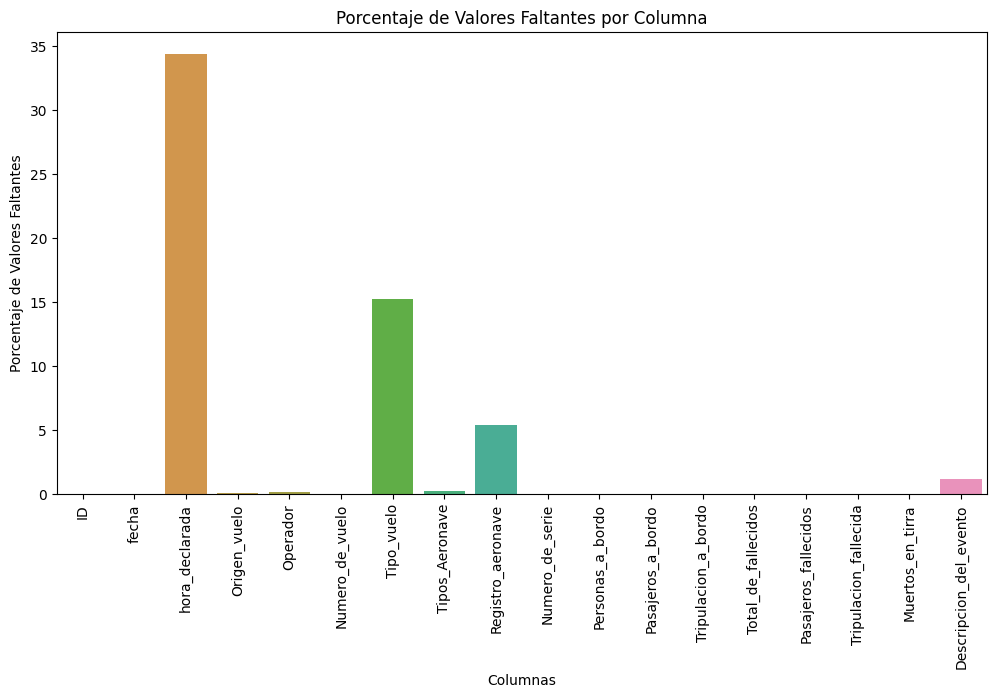

In [276]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.xticks(rotation=90)
plt.show()

In [277]:
df_Accidentes.sum()

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_14556\3315493790.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Accidentes.sum()


ID                                                                12537528
fecha                    17-09-190807-09-190912-07-191206-08-191309-09-...
Personas_a_bordo                                                    155326
Pasajeros_a_bordo                                                   128662
Tripulacion_a_bordo                                                  21644
Total_de_fallecidos                                                 111470
Pasajeros_fallecidos                                                 90404
Tripulacion_fallecida                                                17122
Muertos_en_tirra                                                      8530
dtype: object

Elimino las columnas que no necesitare

In [278]:
df_Accidentes = df_Accidentes.drop(["Numero_de_vuelo","Registro_aeronave","Numero_de_serie","Descripcion_del_evento"],axis=1)

Realizo un análisis estadístico básico para identificar outliers en columnas numéricas

In [279]:
columnas_numericas = df_Accidentes.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

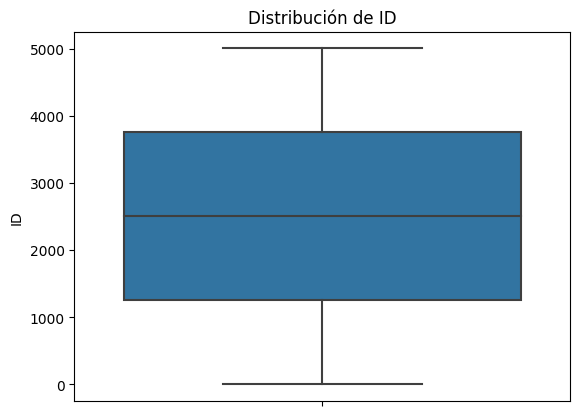

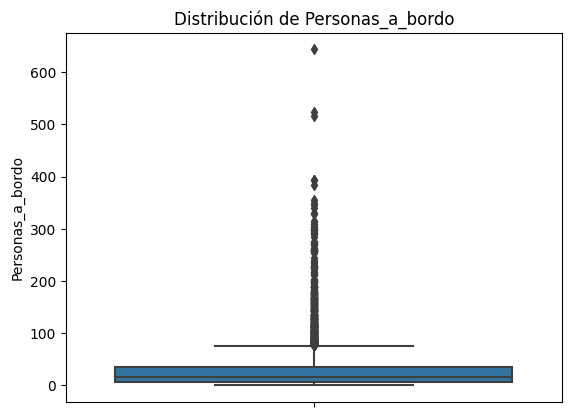

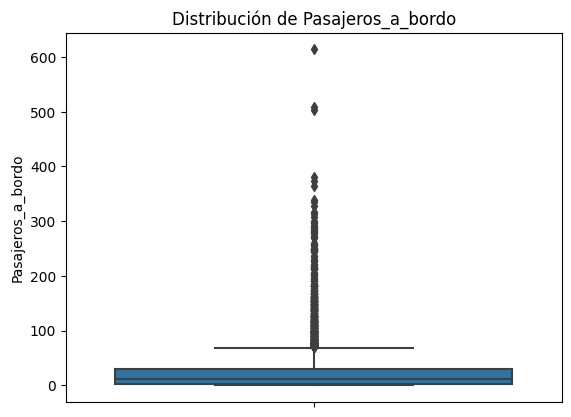

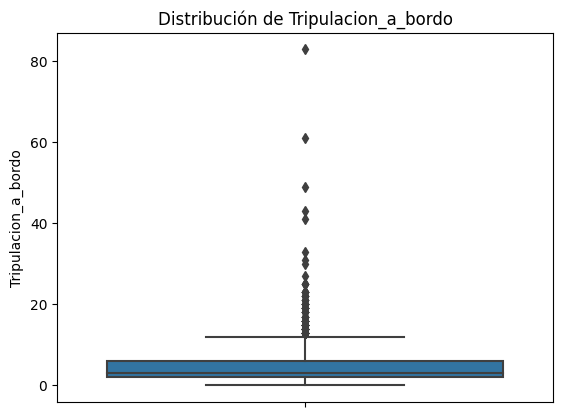

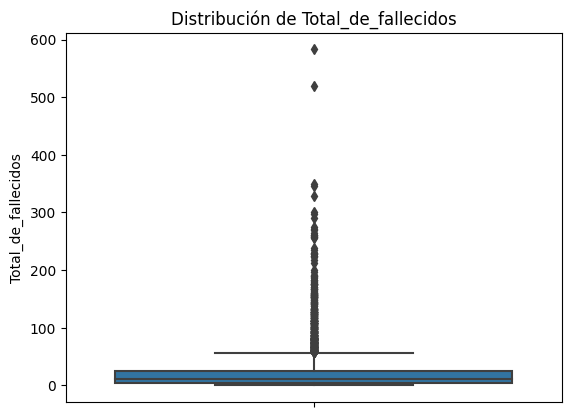

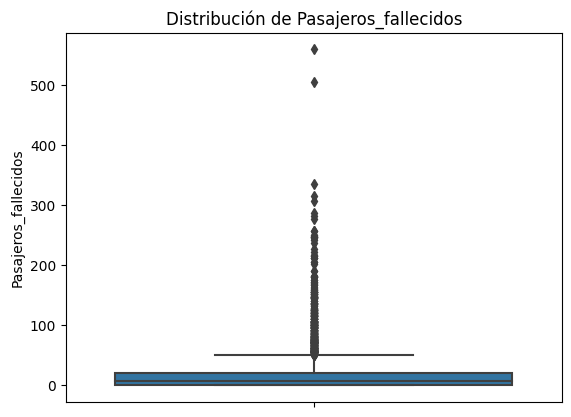

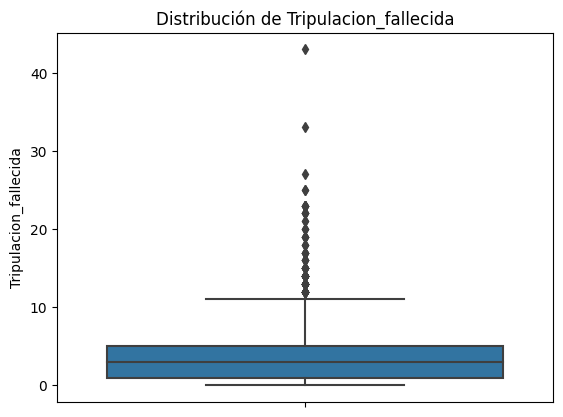

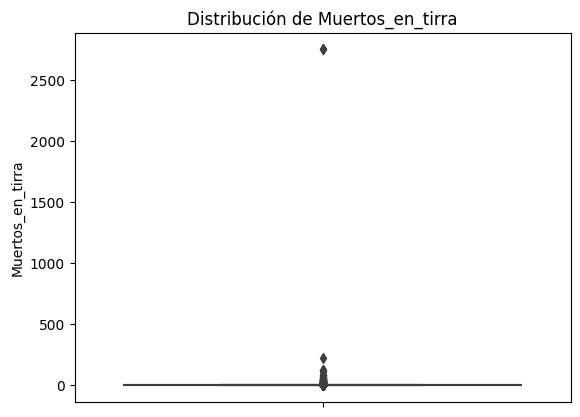

In [280]:
for column in columnas_numericas:
    sns.boxplot(data=df_Accidentes, y=column)
    plt.title(f'Distribución de {column}')
    plt.ylabel(column)
    plt.show()

In [281]:
duplicates = df_Accidentes[df_Accidentes.duplicated(keep='first')]
print(f'Número de registros duplicados: {len(duplicates)}')
df_Accidentes = df_Accidentes.drop_duplicates(keep='first')

Número de registros duplicados: 0


In [282]:
df_Accidentes.describe()

,ID,Personas_a_bordo,Pasajeros_a_bordo,Tripulacion_a_bordo,Total_de_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecida,Muertos_en_tirra
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,2503.500000,31.015575,25.691294,4.321885,22.258387,18.051917,3.418930,1.703275
std,1445.829404,45.438768,43.405075,3.789422,34.983747,33.496574,3.193296,55.251400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1251.750000,6.000000,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000
50%,2503.500000,16.000000,11.000000,3.000000,11.000000,7.000000,3.000000,0.000000
75%,3755.250000,34.250000,29.000000,6.000000,25.000000,20.000000,5.000000,0.000000
max,5007.000000,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


In [283]:
correlation_matrix = df_Accidentes.corr()
correlation_matrix

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_14556\400914965.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_Accidentes.corr()


,ID,Personas_a_bordo,Pasajeros_a_bordo,Tripulacion_a_bordo,Total_de_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecida,Muertos_en_tirra
ID,1.000000,0.214020,0.216757,0.095462,0.162641,0.165355,0.067782,0.029150
Personas_a_bordo,0.214020,1.000000,0.985388,0.555455,0.739870,0.738524,0.315878,0.020420
Pasajeros_a_bordo,0.216757,0.985388,1.000000,0.521004,0.732902,0.749928,0.291456,0.019255
Tripulacion_a_bordo,0.095462,0.555455,0.521004,1.000000,0.432651,0.407597,0.733385,0.032053
Total_de_fallecidos,0.162641,0.739870,0.732902,0.432651,1.000000,0.983890,0.559275,0.032473
Pasajeros_fallecidos,0.165355,0.738524,0.749928,0.407597,0.983890,1.000000,0.516309,0.030480
Tripulacion_fallecida,0.067782,0.315878,0.291456,0.733385,0.559275,0.516309,1.000000,0.043503
Muertos_en_tirra,0.029150,0.020420,0.019255,0.032053,0.032473,0.030480,0.043503,1.000000


Creo la columna año para que se me facilite el calculo

In [284]:
df_Accidentes['año'] = pd.to_datetime(df_Accidentes['fecha'], format='%d-%m-%Y').dt.year

Calculó la suma total de fallecidos en la tripulación y la suma total de accidentes aéreos para la década anterior.

In [285]:
tripulacion_fallecida_decada_anterior = df_Accidentes[(df_Accidentes['año'] >= 2001) & (df_Accidentes['año'] <= 2010)]['Tripulacion_fallecida'].sum()
accidentes_decada_anterior = len(df_Accidentes[(df_Accidentes['año'] >= 2001) & (df_Accidentes['año'] <= 2010)])

Calculó la suma total de fallecidos en la tripulación y la suma total de accidentes aéreos para los últimos 10 años.

In [286]:
tripulacion_fallecida_ultimos_10_anios = df_Accidentes[df_Accidentes['año'] >= 2011]['Tripulacion_fallecida'].sum()
accidentes_ultimos_10_anios = len(df_Accidentes[df_Accidentes['año'] >= 2011])

Calculó la tasa de fatalidad de la década anterior y de los últimos 10 años.

In [287]:
tasa_fatalidad_decada_anterior = tripulacion_fallecida_decada_anterior / accidentes_decada_anterior
tasa_fatalidad_ultimos_10_anios = tripulacion_fallecida_ultimos_10_anios / accidentes_ultimos_10_anios

Calculó el KPI como el porcentaje de cambio en la tasa de fatalidad y lo muestro

In [288]:
kpi = ((tasa_fatalidad_decada_anterior - tasa_fatalidad_ultimos_10_anios) / tasa_fatalidad_decada_anterior) * 100
print(f"KPI: {kpi:.2f}%")

KPI: -12.75%


Creo un gráfico para visualizar el KPI.

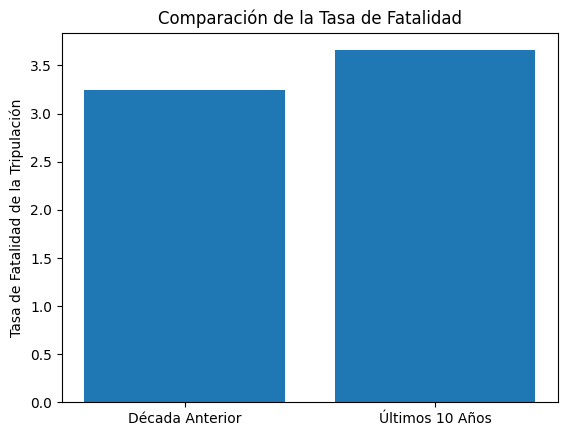

In [289]:
fig, ax = plt.subplots()
ax.bar(['Década Anterior', 'Últimos 10 Años'], [tasa_fatalidad_decada_anterior, tasa_fatalidad_ultimos_10_anios])
ax.set_ylabel('Tasa de Fatalidad de la Tripulación')
plt.title('Comparación de la Tasa de Fatalidad')
plt.show()

In [216]:
df_Accidentes.to_csv('accidentes_ar.csv', index=False)